# Methods for Geographical Plotting in Python

## Choropleth Maps

Choropleth maps are one type of data visualization available in plot.ly. From a coding perspective, they consist of a data dictionary that defines the data, the location, colorscale, labels, values, and so on, and a layout dictionary that contains information about the map title, geography, and so on. These dictionaries are po

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go

In [3]:
init_notebook_mode(connected=True)

In [4]:
cf.go_offline()

In [23]:
path = '/mnt/c/Users/bknorris/Documents/Scripts/Python/Python_for_data_science/Py_DS_ML_Bootcamp/09-Geographical-Plotting/'

## Choropleth US Maps

Plotly's mapping can be a bit hard to get used to at first, remember to reference the cheat sheet in the data visualization folder, or [find it online here](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf).

In [18]:
# Check out the Choropleth documentation for more details on this data type
data = dict(type = 'choropleth',
            locations = ['AZ','CA','NY','OR'],
            locationmode = 'USA-states',
            colorscale = 'Greens',
            text = ['text1','text2','text3','text4'],
            z = [1.0,2.0,3.0,4.0],
            colorbar = {'title':'Colorbar Title'})

In [19]:
data

{'type': 'choropleth',
 'locations': ['AZ', 'CA', 'NY', 'OR'],
 'locationmode': 'USA-states',
 'colorscale': 'Greens',
 'text': ['text1', 'text2', 'text3', 'text4'],
 'z': [1.0, 2.0, 3.0, 4.0],
 'colorbar': {'title': 'Colorbar Title'}}

In [20]:
layout = dict(geo={'scope':'usa'})

In [21]:
choromap = go.Figure(data = [data],layout = layout)

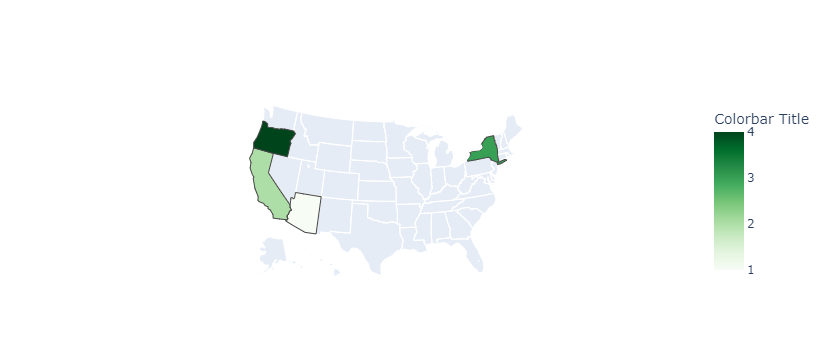

In [22]:
iplot(choromap)

In [24]:
df = pd.read_csv(path+"2011_US_AGRI_Exports")

In [26]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [33]:
data = dict(type = 'choropleth',
            locations = df['code'],
            locationmode = 'USA-states',
            colorscale = 'ylorbr',
            text = df['text'],
            z = df['total exports'],
            marker = dict(line = dict(color = 'rgb(12,12,12)',width=1)),
            colorbar = {'title':'Millions USD'})

In [34]:
layout = dict(title = '2011 US Agriculture Exports by State',
              geo=dict(scope='usa', showlakes=True, lakecolor='rgb(85,173,240)'))

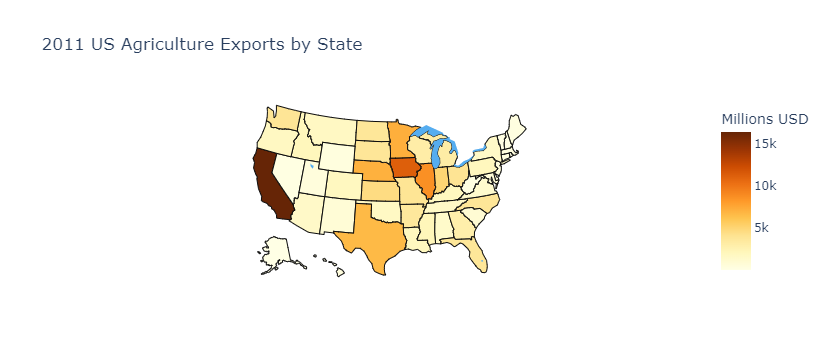

In [35]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

## Choropleth Global Maps

In [38]:
df = pd.read_csv(path+'2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [39]:
data = dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
      ) 

In [42]:
layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

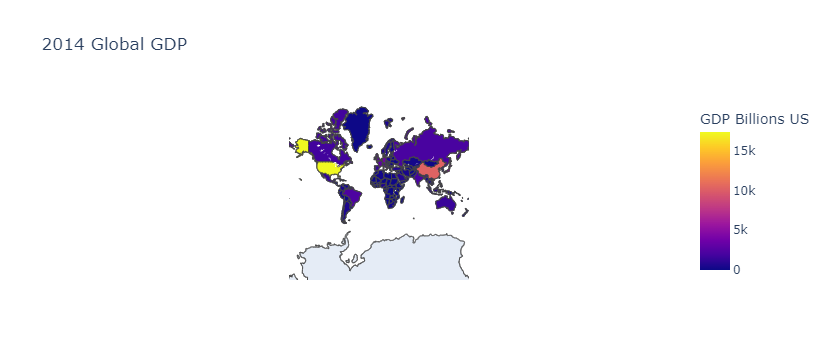

In [43]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)